In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


/Users/daisuketakada/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


どの分類機を使用するのかを指定。    
「方法名」と「内容」のリストを作成。    
pythonは「.」で関数をチェインさせる( %>% )

## HW:ここのclassifiersを変えれば、各パッケージの技法のパラメータが変わる。

In [3]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

h = .02  # step size in the mesh。これだけ細かかったら、点々には見えないだろうなー

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

データセットを作成。    
- make_classification関数はsklearn.datasetsに含まれており、サンプル数や特徴量数などいくつかのパラメータを指定するだけで、簡単に分類問題用のサンプルデータ作成することができます    


[make_classification](http://overlap.hatenablog.jp/entry/2015/10/08/022246)
n_featuresは二つの特徴量    
n_informativeは目的変数とそっくりの特徴量２つ(２以下なら選べる)     
random_stateはset.seed()に相当?    
最後のは1クラスあたりのクラスタ数    

In [4]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1)
#len(X)=100, y:outcome X:2col*100row dataset continuous
#X.shape=(100, 2)
rng = np.random.RandomState(2)#これはなんだ？seed?
X += 2 * rng.uniform(size=X.shape)#ここは回すたびに変わるので上の行がseedであれば利いてなさそうだけど。。。cf. a += bは、 a = a + b に同じ
linearly_separable = (X, y)#linearly_separableには、arrayを二つ入れただけ

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]#arrayを二つ並べたものが三つ繋がっているリスト


さあ頑張ろう

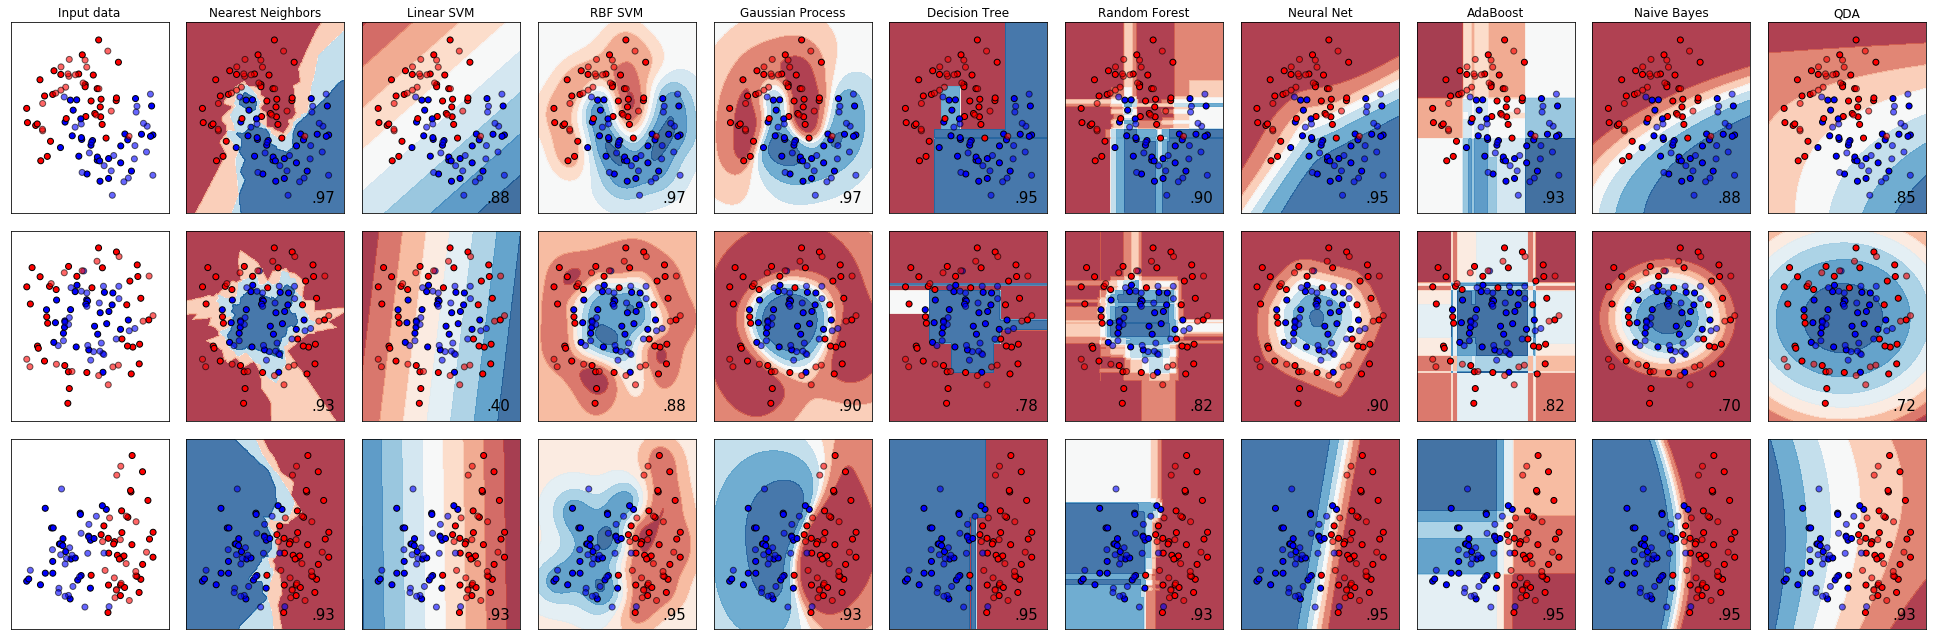

In [5]:
figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):#enumarate()はfor内部の返し方で、番号[index]付きで返ってくる
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)#StandardScaler と MinMaxScaler がそれぞれ 標準化 と 正規化 のモジュール
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),#
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu#どうやらcolor mapの関数らしい、五行下の散布図で使用
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])#赤と青に相当する
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i) #3*11のサブプロット
    if ds_cnt == 0:
        ax.set_title("Input data")
        
    # Plot the training and test points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,                  edgecolors='k')
    ax.scatter(X_test[:, 0],  X_test[:, 1],  c=y_test,  cmap=cm_bright, alpha=0.6, edgecolors='k')
    
    ax.set_xlim(xx.min(), xx.max())#x軸の範囲をxx,yyのとりうる範囲
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers(ここからは名前毎に入れて、分類機毎に入れる)
    for name, clf in zip(names, classifiers):#zip関数は複数のシーケンスをまとめてループ
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):#hasattr()は、持っているかどうかをlogical値で返す
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

参考：
標準化
> sc = StandardScaler()    
> data_std = sc.fit_transform(data)
 
正規化
> ms = MinMaxScaler()    
> data_norm = ms.fit_transform(data)


以下、理解の残骸

In [38]:
np.arange(1,10,2)


array([1, 3, 5, 7, 9])

In [39]:
np.meshgrid(0:4,1:5)

SyntaxError: invalid syntax (<ipython-input-39-8fb8b5911eca>, line 1)

In [40]:
dir(cm)#属性の確認

['N',
 '__call__',
 '__class__',
 '__copy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_gamma',
 '_i_bad',
 '_i_over',
 '_i_under',
 '_init',
 '_isinit',
 '_lut',
 '_resample',
 '_rgba_bad',
 '_rgba_over',
 '_rgba_under',
 '_segmentdata',
 '_set_extremes',
 'colorbar_extend',
 'from_list',
 'is_gray',
 'monochrome',
 'name',
 'reversed',
 'set_bad',
 'set_gamma',
 'set_over',
 'set_under']

In [42]:
xx,yy

(array([[-2.69997218, -2.67997218, -2.65997218, ...,  2.20002782,
          2.22002782,  2.24002782],
        [-2.69997218, -2.67997218, -2.65997218, ...,  2.20002782,
          2.22002782,  2.24002782],
        [-2.69997218, -2.67997218, -2.65997218, ...,  2.20002782,
          2.22002782,  2.24002782],
        ...,
        [-2.69997218, -2.67997218, -2.65997218, ...,  2.20002782,
          2.22002782,  2.24002782],
        [-2.69997218, -2.67997218, -2.65997218, ...,  2.20002782,
          2.22002782,  2.24002782],
        [-2.69997218, -2.67997218, -2.65997218, ...,  2.20002782,
          2.22002782,  2.24002782]]),
 array([[-2.31370696, -2.31370696, -2.31370696, ..., -2.31370696,
         -2.31370696, -2.31370696],
        [-2.29370696, -2.29370696, -2.29370696, ..., -2.29370696,
         -2.29370696, -2.29370696],
        [-2.27370696, -2.27370696, -2.27370696, ..., -2.27370696,
         -2.27370696, -2.27370696],
        ...,
        [ 3.32629304,  3.32629304,  3.32629304, ...,  